[*********************100%***********************]  1 of 1 completed


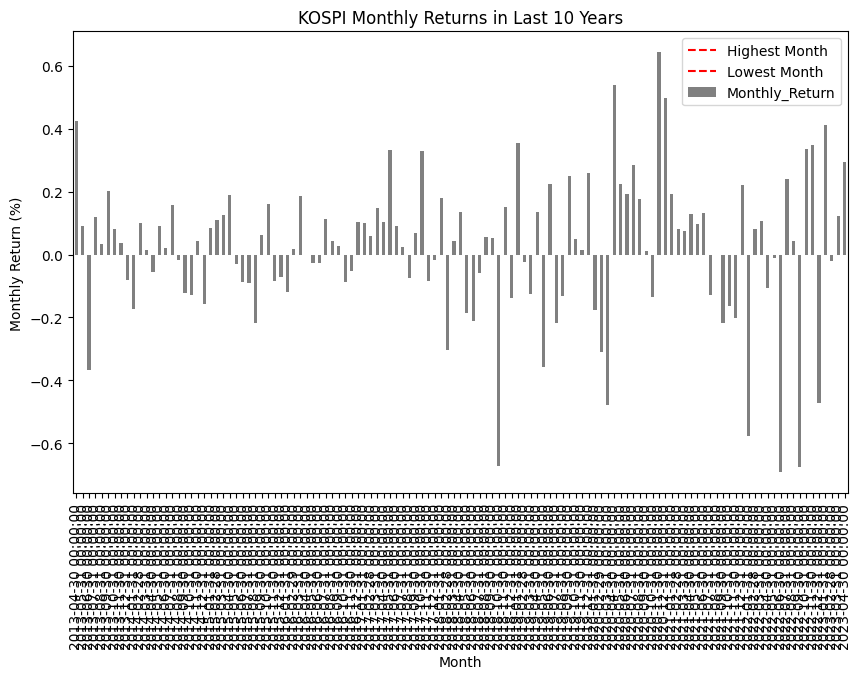

가장 높은 월:  2020-11
가장 낮은 월:  2022-06


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# 시작 날짜와 종료 날짜 설정 (10년 전부터 현재까지)
start_date = pd.Timestamp('now') - pd.DateOffset(years=10)
end_date = pd.Timestamp('now')

# 코스피 데이터 가져오기
kospi = yf.download('^KS11', start=start_date, end=end_date)

# 월 별 수익률 계산
kospi['Monthly_Return'] = kospi['Close'].pct_change().mul(100)

# 월 별 수익률을 인덱스를 기준으로 그룹화하여 평균 수익률 계산
monthly_returns = kospi.resample('M').mean()

# 가장 높은 월과 낮은 월 구하기
highest_month = monthly_returns['Monthly_Return'].idxmax()
lowest_month = monthly_returns['Monthly_Return'].idxmin()

# 시각화
plt.figure(figsize=(10, 6))
monthly_returns['Monthly_Return'].plot(kind='bar', color='gray')
plt.axvline(highest_month, color='red', linestyle='--', label='Highest Month')
plt.axvline(lowest_month, color='red', linestyle='--', label='Lowest Month')
plt.xlabel('Month')
plt.ylabel('Monthly Return (%)')
plt.title('KOSPI Monthly Returns in Last 10 Years')
plt.legend()
plt.show()

print("가장 높은 월: ", highest_month.strftime('%Y-%m'))
print("가장 낮은 월: ", lowest_month.strftime('%Y-%m'))


In [3]:
# 시작 날짜와 종료 날짜 설정 (10년 전부터 현재까지)
start_date = pd.Timestamp('now') - pd.DateOffset(years=10)
end_date = pd.Timestamp('now')

# 코스피 데이터 가져오기
kospi = yf.download('^KS11', start=start_date, end=end_date)

kospi.reset_index

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-04-19,1899.349976,1910.239990,1888.300049,1906.750000,1906.750000,331300
2013-04-22,1903.969971,1926.310059,1901.979980,1926.310059,1926.310059,258800
2013-04-23,1924.430054,1924.790039,1908.770020,1918.630005,1918.630005,260500
2013-04-24,1931.060059,1939.349976,1921.030029,1935.310059,1935.310059,341100
2013-04-25,1937.880005,1951.660034,1935.810059,1951.599976,1951.599976,335000
...,...,...,...,...,...,...
2023-04-13,2534.709961,2561.659912,2531.070068,2561.659912,2561.659912,840300
2023-04-14,2580.100098,2581.739990,2560.530029,2571.489990,2571.489990,890500
2023-04-17,2570.300049,2577.080078,2561.139893,2575.909912,2575.909912,774600


---

[*********************100%***********************]  1 of 1 completed
Shapiro-Wilk 검정 결과
검정 통계량 (W): 0.9750616550445557
p-value: 2.605621557449922e-05
p-value가 유의수준보다 작으므로 정규성을 가정할 수 없습니다.


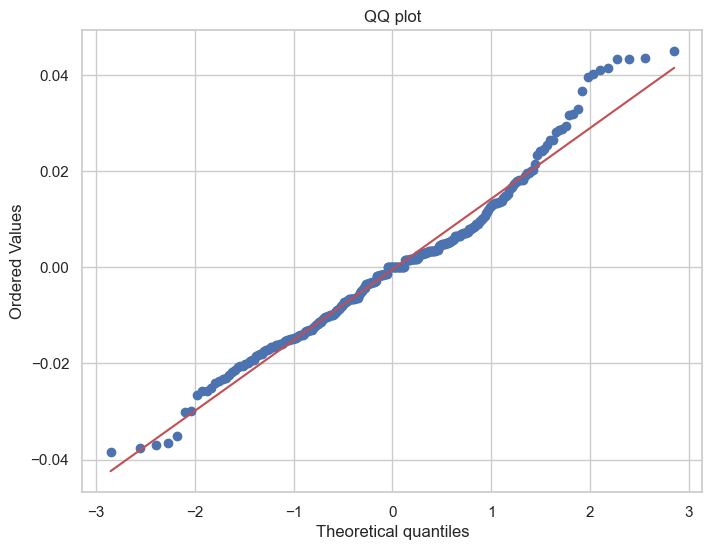

In [4]:
import yfinance as yf
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 삼성전자 주식 데이터 가져오기
samsung_stock = yf.download('005930.KS', start='2022-01-01', end='2023-04-19')

# 삼성전자 주식의 일간 수익률 계산
samsung_returns = samsung_stock['Close'].pct_change().dropna()

# Shapiro-Wilk 검정
shapiro_stat, shapiro_p_value = stats.shapiro(samsung_returns)
print("Shapiro-Wilk 검정 결과")
print("검정 통계량 (W):", shapiro_stat)
print("p-value:", shapiro_p_value)
alpha = 0.05 # 유의수준 설정
if shapiro_p_value > alpha:
    print("p-value가 유의수준보다 크므로 정규성을 가정할 수 있습니다.")
else:
    print("p-value가 유의수준보다 작으므로 정규성을 가정할 수 없습니다.")

# QQ plot 그리기
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
stats.probplot(samsung_returns, dist='norm', plot=plt)
plt.title("QQ plot")
plt.show()


[*********************100%***********************]  1 of 1 completed
Shapiro-Wilk 검정 결과
검정 통계량 (W): 0.9962722063064575
p-value: 0.6677554249763489
p-value가 유의수준보다 크므로 정규성을 가정할 수 있습니다.


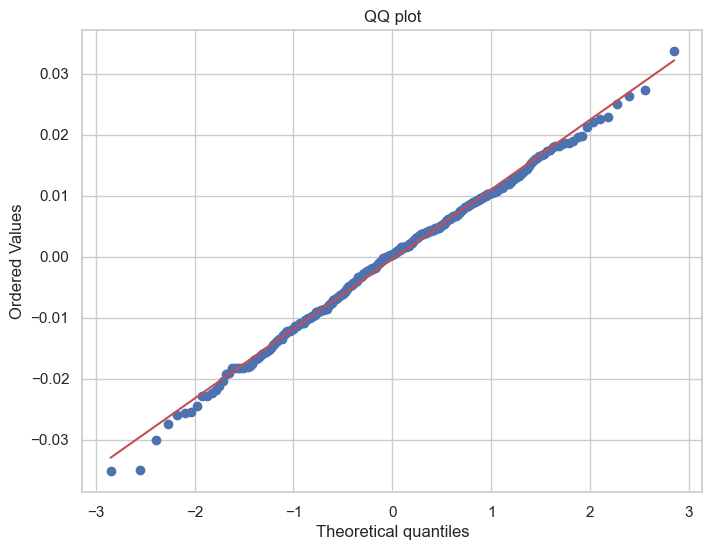

In [15]:
import yfinance as yf
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 코스피 주식 데이터 가져오기
kospi_stock = yf.download('^KS11', start='2022-01-01', end='2023-04-19')

# 코스피 주식의 일간 수익률 계산
kospi_returns = kospi_stock['Close'].pct_change().dropna()

# Shapiro-Wilk 검정
shapiro_stat, shapiro_p_value = stats.shapiro(kospi_returns)
print("Shapiro-Wilk 검정 결과")
print("검정 통계량 (W):", shapiro_stat)
print("p-value:", shapiro_p_value)
alpha = 0.05 # 유의수준 설정
if shapiro_p_value > alpha:
    print("p-value가 유의수준보다 크므로 정규성을 가정할 수 있습니다.")
else:
    print("p-value가 유의수준보다 작으므로 정규성을 가정할 수 없습니다.")

# QQ plot 그리기
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
stats.probplot(kospi_returns, dist='norm', plot=plt)
plt.title("QQ plot")
plt.show()


In [16]:
import yfinance as yf
import numpy as np
import scipy.stats as stats

# 코스피 주식 데이터 가져오기
kospi_stock = yf.download('^KS11', start='2022-01-01', end='2023-04-19')

# 코스피 주식의 일간 수익률 계산
kospi_returns = kospi_stock['Close'].pct_change().dropna()

# 기대 수익률 계산
expected_return = kospi_returns.mean()

# 위험 계산
risk = kospi_returns.std()

print("기대 수익률: ", expected_return*252)
print("위험(표준편차): ", risk* np.sqrt(252))


[*********************100%***********************]  1 of 1 completed
기대 수익률:  -0.10231902216357541
위험(표준편차):  0.18082523184406946


---

In [11]:
import yfinance as yf
import numpy as np
import scipy.stats as stats

# 삼성전자 주식 데이터 가져오기
samsung_stock = yf.download('005930.KS', start='2022-01-01', end='2023-04-19')

# 삼성전자 주식의 일간 수익률 계산
samsung_returns = samsung_stock['Close'].pct_change().dropna()

# 기대 수익률 계산
expected_return = samsung_returns.mean()

# 위험 계산
risk = samsung_returns.std()

print("기대 수익률: ", expected_return*252)
print("위험(표준편차): ", risk* np.sqrt(252))


[*********************100%***********************]  1 of 1 completed
기대 수익률:  -0.1172192800059749
위험(표준편차):  0.23524281490558102


[*********************100%***********************]  1 of 1 completed
Shapiro-Wilk 검정 결과
검정 통계량 (W): 0.9768305420875549
p-value: 0.09006009250879288
p-value가 유의수준보다 크므로 정규성을 가정할 수 있습니다.


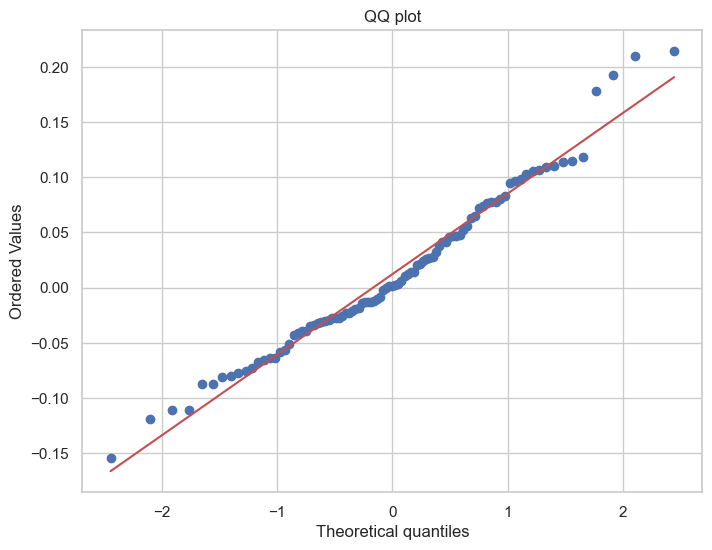

In [6]:
import yfinance as yf
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 삼성전자 주식 데이터 가져오기
samsung_stock = yf.download('005930.KS', start='2015-04-19', end='2023-04-19', interval='1mo')

# 월별 종가를 이용한 월별 수익률 계산
samsung_monthly_returns = samsung_stock['Close'].resample('M').last().pct_change().dropna()

# Shapiro-Wilk 검정
shapiro_stat, shapiro_p_value = stats.shapiro(samsung_monthly_returns)
print("Shapiro-Wilk 검정 결과")
print("검정 통계량 (W):", shapiro_stat)
print("p-value:", shapiro_p_value)
alpha = 0.05 # 유의수준 설정
if shapiro_p_value > alpha:
    print("p-value가 유의수준보다 크므로 정규성을 가정할 수 있습니다.")
else:
    print("p-value가 유의수준보다 작으므로 정규성을 가정할 수 없습니다.")

# QQ plot 그리기
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
stats.probplot(samsung_monthly_returns, dist='norm', plot=plt)
plt.title("QQ plot")
plt.show()


In [12]:
import yfinance as yf
import numpy as np
import scipy.stats as stats


# 삼성전자 주식 데이터 가져오기
samsung_stock = yf.download('005930.KS', start='2015-04-19', end='2023-04-19', interval='1mo')

# 월별 종가를 이용한 월별 수익률 계산
samsung_monthly_returns = samsung_stock['Close'].resample('M').last().pct_change().dropna()

# 삼성전자 주식의 일간 수익률 계산
samsung_returns = samsung_stock['Close'].pct_change().dropna()

# 기대 수익률 계산
expected_return = samsung_returns.mean()

# 위험 계산
risk = samsung_returns.std()

print("기대 수익률: ", expected_return * 12)
print("위험(표준편차): ", risk* np.sqrt(12))


[*********************100%***********************]  1 of 1 completed
기대 수익률:  0.14676093142761082
위험(표준편차):  0.25219858509725496


[*********************100%***********************]  1 of 1 completed
Shapiro-Wilk 검정 결과
검정 통계량 (W): 0.963645339012146
p-value: 0.009721665643155575
p-value가 유의수준보다 작으므로 정규성을 가정할 수 없습니다.


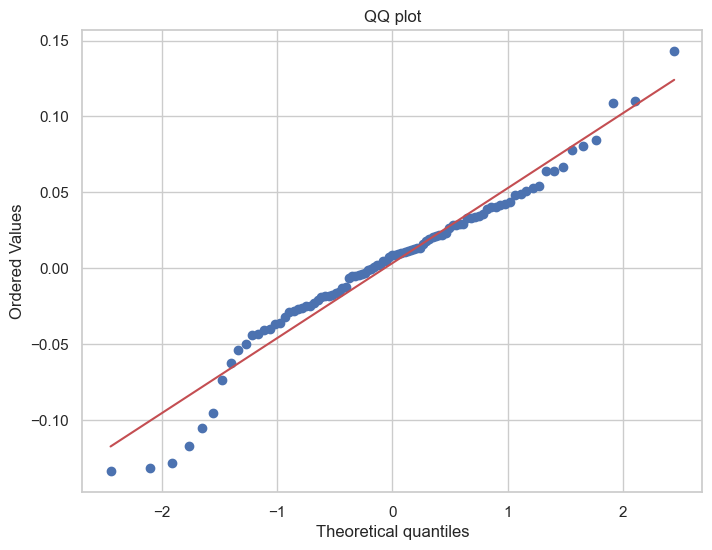

In [14]:
import yfinance as yf
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 삼성전자 주식 데이터 가져오기
kospi_stock = yf.download('^KS11', start='2015-04-19', end='2023-04-19', interval='1mo')

# 월별 종가를 이용한 월별 수익률 계산
kospi_monthly_returns = kospi_stock['Close'].resample('M').last().pct_change().dropna()

# Shapiro-Wilk 검정
shapiro_stat, shapiro_p_value = stats.shapiro(kospi_monthly_returns)
print("Shapiro-Wilk 검정 결과")
print("검정 통계량 (W):", shapiro_stat)
print("p-value:", shapiro_p_value)
alpha = 0.05 # 유의수준 설정
if shapiro_p_value > alpha:
    print("p-value가 유의수준보다 크므로 정규성을 가정할 수 있습니다.")
else:
    print("p-value가 유의수준보다 작으므로 정규성을 가정할 수 없습니다.")

# QQ plot 그리기
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
stats.probplot(kospi_monthly_returns, dist='norm', plot=plt)
plt.title("QQ plot")
plt.show()


In [13]:
import yfinance as yf
import numpy as np
import scipy.stats as stats


# 삼성전자 주식 데이터 가져오기
kospi_stock = yf.download('^KS11', start='2015-04-19', end='2023-04-19', interval='1mo')

# 월별 종가를 이용한 월별 수익률 계산
kospi_monthly_returns = kospi_stock['Close'].resample('M').last().pct_change().dropna()

# 삼성전자 주식의 일간 수익률 계산
kospi_returns = kospi_stock['Close'].pct_change().dropna()

# 기대 수익률 계산
expected_return = kospi_returns.mean()

# 위험 계산
risk = kospi_returns.std()

print("기대 수익률: ", expected_return * 12)
print("위험(표준편차): ", risk* np.sqrt(12))


[*********************100%***********************]  1 of 1 completed
기대 수익률:  0.03979684881803424
위험(표준편차):  0.17199487207257738


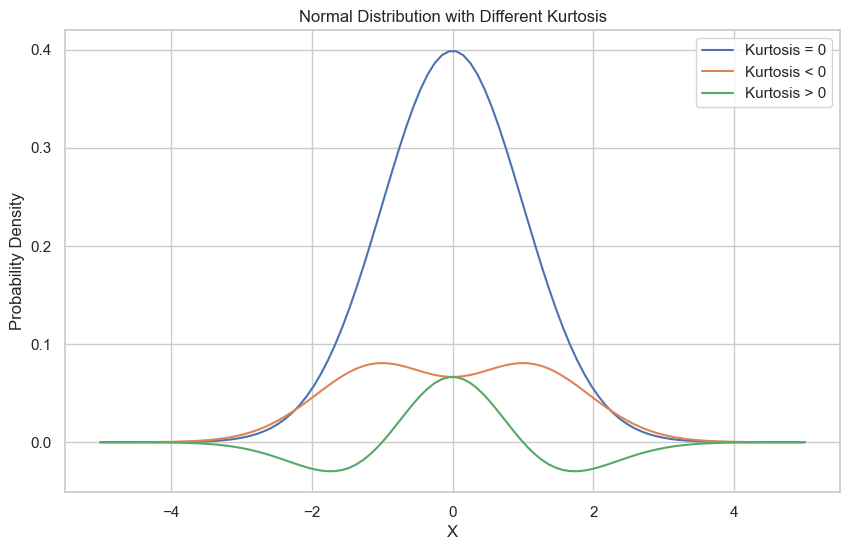

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 평균과 표준편차 설정
mu = 0
sigma = 1

# x 범위 설정
x = np.linspace(-5, 5, 100)

# 첨도가 0인 정규분포
kurtosis_0 = norm.pdf(x, mu, sigma)

# 첨도가 음수인 정규분포
kurtosis_negative = norm.pdf(x, mu, sigma) * (1 + ((x - mu) / sigma) ** 2) / 6

# 첨도가 양수인 정규분포
kurtosis_positive = norm.pdf(x, mu, sigma) * (1 - ((x - mu) / sigma) ** 2) / 6

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, kurtosis_0, label='Kurtosis = 0')
plt.plot(x, kurtosis_negative, label='Kurtosis < 0')
plt.plot(x, kurtosis_positive, label='Kurtosis > 0')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Normal Distribution with Different Kurtosis')
plt.legend()
plt.grid(True)
plt.show()


---

In [30]:
import yfinance as yf
import pandas as pd

# 종목 심볼 (예: 삼성전자)
ticker = '005930.KS'

# 데이터 가져올 기간 설정
start_date = '2023-04-12'
end_date = '2023-04-19'

# yf.download() 함수를 사용하여 데이터 가져오기
df = yf.download(ticker, start=start_date, end=end_date, interval='1m')

# 데이터 출력
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-12 09:00:00+09:00,65800.0,65800.0,65600.0,65600.0,65600.0,0
2023-04-12 09:01:00+09:00,65700.0,65700.0,65500.0,65500.0,65500.0,207540
2023-04-12 09:02:00+09:00,65600.0,65700.0,65500.0,65700.0,65700.0,542552
2023-04-12 09:03:00+09:00,65700.0,65700.0,65500.0,65600.0,65600.0,135844
2023-04-12 09:04:00+09:00,65600.0,65700.0,65500.0,65500.0,65500.0,155925
...,...,...,...,...,...,...
2023-04-18 14:55:00+09:00,65400.0,65500.0,65400.0,65400.0,65400.0,14201
2023-04-18 14:56:00+09:00,65400.0,65500.0,65400.0,65500.0,65500.0,21783
2023-04-18 14:57:00+09:00,65400.0,65500.0,65400.0,65500.0,65500.0,17172


In [16]:
import pandas as pd
import yfinance as yf
import numpy as np

# 삼성전자 주식 데이터 가져오기
kospi_stock = yf.download('^KS11', start='2015-04-19', end='2023-04-19', interval='1mo')
samsung_stock = yf.download('005930.KS', start='2015-04-19', end='2023-04-19', interval='1mo')

# 월별 종가를 이용한 월별 수익률 계산
kospi_monthly_returns = kospi_stock['Close'].pct_change().dropna()
samsung_monthly_returns = samsung_stock['Close'].pct_change().dropna()

# 피어슨 상관계수 계산
correlation = np.corrcoef(samsung_monthly_returns, kospi_monthly_returns)[0, 1]

print("삼성전자와 코스피의 피어슨 상관계수: ", correlation)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
삼성전자와 코스피의 피어슨 상관계수:  0.7663421553517743


In [17]:
np.corrcoef(samsung_monthly_returns, kospi_monthly_returns)

array([[1.        , 0.76634216],
       [0.76634216, 1.        ]])

In [15]:
import pandas as pd
import yfinance as yf
import numpy as np
import statsmodels.api as sm

# 삼성전자 주식 데이터 가져오기
kospi_stock = yf.download('^KS11', start='2022-01-31', end='2022-12-31')
samsung_stock = yf.download('005930.KS', start='2012-01-31', end='2022-12-31')

# 월별 종가를 이용한 월별 수익률 계산
kospi_monthly_returns = kospi_stock['Close'].pct_change().dropna()
samsung_monthly_returns = samsung_stock['Close'].pct_change().dropna()

# 데이터프레임 생성
df = pd.DataFrame({'samsung_monthly_returns': samsung_monthly_returns, 'kospi_monthly_returns': kospi_monthly_returns})

# 결측값 및 무한대 처리
df = df.dropna() # 결측값이 있는 행 삭제
df = df.replace([np.inf, -np.inf], np.nan) # 무한대 값을 결측값으로 대체
df = df.dropna() # 결측값이 있는 행 삭제

# 상수항 추가
X = sm.add_constant(df['kospi_monthly_returns'])

# 회귀분석 모델 학습
model = sm.OLS(df['samsung_monthly_returns'], X)
results = model.fit()

# 회귀분석 결과 출력
print(results.summary())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                               OLS Regression Results                              
Dep. Variable:     samsung_monthly_returns   R-squared:                       0.573
Model:                                 OLS   Adj. R-squared:                  0.571
Method:                      Least Squares   F-statistic:                     298.1
Date:                     Wed, 19 Apr 2023   Prob (F-statistic):           6.42e-43
Time:                             11:28:59   Log-Likelihood:                 722.92
No. Observations:                      224   AIC:                            -1442.
Df Residuals:                          222   BIC:                            -1435.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                      